In [1]:
import polars as pl
import matplotlib.pyplot as plt

In [2]:
from pathlib import Path

project_root = Path.cwd().parent
data_csv_path = project_root / "data" / "raw" / "job_market.csv"

In [3]:
df = pl.read_csv(str(data_csv_path))

In [4]:
df.head(5)

job_title,company,location,job_type,category,salary_min,salary_max,experience_required,publication_date,skills
str,str,str,str,str,i64,i64,i64,str,str
"""Engineering Manager""","""DataInc""","""San Francisco, CA""","""Remote""","""Technology""",151082,291345,4,"""2025-11-27""","""AWS, Agile, Machine Learning, …"
"""Engineering Manager""","""EnterpriseHub""","""New York, NY""","""Remote""","""Technology""",156891,280075,3,"""2025-11-27""","""Java, Agile, Git, SQL, Ruby, G…"
"""Engineering Manager""","""StartupXYZ""","""Seattle, WA""","""Part-time""","""Technology""",152134,280310,4,"""2025-11-27""","""AWS, Python, Kubernetes, Git"""
"""Lead Engineer""","""WebDynamics""","""Seattle, WA""","""Full-time""","""Technology""",151918,253988,7,"""2025-11-27""","""Agile, Git, Docker, REST APIs,…"
"""Senior Software Engineer""","""DigitalWorks""","""San Francisco, CA""","""Full-time""","""Technology""",148141,252584,9,"""2025-11-27""","""Agile, Ruby, Docker, Git, Java…"


In [5]:
df.shape

(250, 10)

In [6]:
df.null_count()

job_title,company,location,job_type,category,salary_min,salary_max,experience_required,publication_date,skills
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,29,20,0,0,43,0,50


In [7]:
for col in df.columns:
    print(f"{col}: {df[col].n_unique()}")

job_title: 57
company: 40
location: 44
job_type: 12
category: 13
salary_min: 206
salary_max: 206
experience_required: 14
publication_date: 30
skills: 201


In [8]:
df.describe()

statistic,job_title,company,location,job_type,category,salary_min,salary_max,experience_required,publication_date,skills
str,str,str,str,str,str,f64,f64,f64,str,str
"""count""","""250""","""250""","""250""","""221""","""230""",250.0,250.0,207.0,"""250""","""200"""
"""null_count""","""0""","""0""","""0""","""29""","""20""",0.0,0.0,43.0,"""0""","""50"""
"""mean""",null,null,null,null,null,89067.9,155685.424,4.227053,null,null
"""std""",null,null,null,null,null,23183.593666,42842.170809,2.461676,null,null
"""min""","""(Junior) Media Buyer Influence…","""1KOMMA5˚""","""Atlanta, GA""","""Contract""","""Finance""",45000.0,70000.0,0.0,"""1764176516""","""AWS, Agile, Machine Learning, …"
"""25%""",null,null,null,null,null,71875.0,130316.0,3.0,null,null
"""50%""",null,null,null,null,null,88302.0,149577.0,4.0,null,null
"""75%""",null,null,null,null,null,105801.0,187098.0,5.0,null,null
"""max""","""Werkstudent:in Performance Mar…","""onest.""","""Wolfsburg, Lower Saxony, Germa…","""professional / experienced""","""Technology""",156891.0,291345.0,12.0,"""2025-11-27""","""TypeScript, SQL, Node.js, Agil…"


In [9]:
for col in df.columns:
    if df[col].dtype.is_numeric():
        vals = df[col].drop_nulls()
        q1 = vals.quantile(0.25)
        q3 = vals.quantile(0.75)
        
        iqr = q3 - q1

        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        
        outliers = df.filter((pl.col(col) < lower) | (pl.col(col) > upper)).height
        total = df[col].len()
        
        print(f"{col}: {outliers}/{total} ({outliers / total * 100 :.1f}%)")

salary_min: 1/250 (0.4%)
salary_max: 3/250 (1.2%)
experience_required: 19/250 (7.6%)


In [10]:
for col in df.columns:
    if not df[col].dtype.is_numeric():
        counts = df[col].value_counts().sort("count")
        total = df[col].drop_nulls().len()
        
        if counts.height > 0:
            rare_val, rare_cnt = counts[0, col], counts[0, "count"]
            common_val, common_cnt = counts[-1, col], counts[-1, "count"]
            
            print(f"{col}: common: ({common_cnt/total*100:.1f}%), rare: ({rare_cnt/total*100:.1f}%)")

job_title: common: (5.6%), rare: (0.4%)
company: common: (10.0%), rare: (0.4%)
location: common: (10.8%), rare: (0.4%)
job_type: common: (24.9%), rare: (0.5%)
category: common: (87.0%), rare: (0.4%)
publication_date: common: (80.0%), rare: (0.4%)
skills: common: (25.0%), rare: (0.5%)


array([[<Axes: title={'center': 'salary_max'}>]], dtype=object)

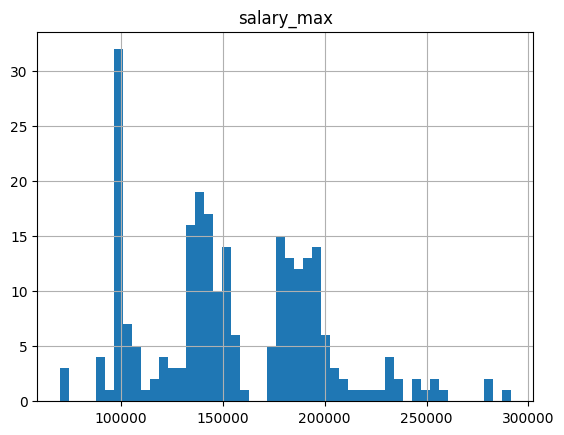

In [20]:
df.select("salary_max").to_pandas().hist(bins=50)

{'whiskers': [<matplotlib.lines.Line2D at 0x269fd1dc410>,
 'caps': [<matplotlib.lines.Line2D at 0x269fd1dc980>,
 'boxes': [<matplotlib.lines.Line2D at 0x269fd1dc110>],
 'medians': [<matplotlib.lines.Line2D at 0x269fd1dce90>],
 'fliers': [<matplotlib.lines.Line2D at 0x269fd1dd100>],
 'means': []}

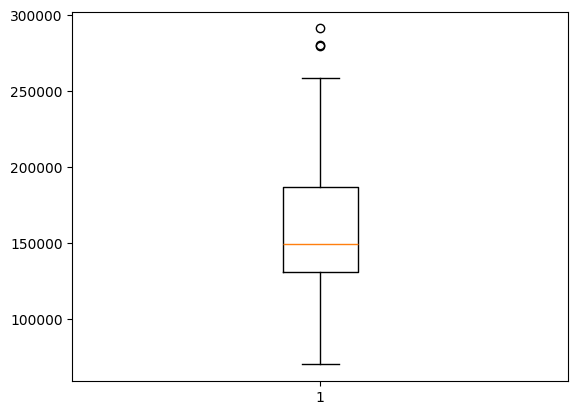

In [19]:
plt.boxplot(df["salary_max"].to_pandas(), vert=True)

array([[<Axes: title={'center': 'salary_min'}>]], dtype=object)

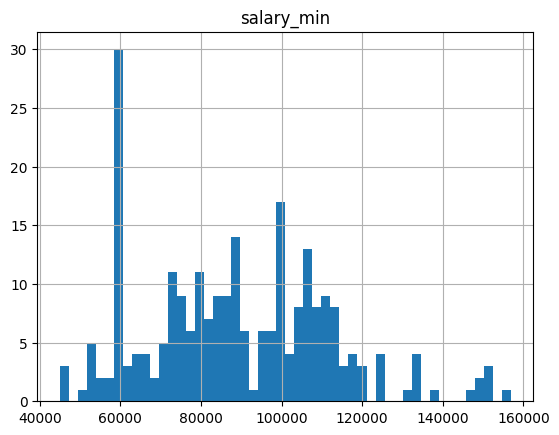

In [21]:
df.select("salary_min").to_pandas().hist(bins=50)

{'whiskers': [<matplotlib.lines.Line2D at 0x269fd2c46b0>,
 'caps': [<matplotlib.lines.Line2D at 0x269fd2c4c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x269fd28d490>],
 'medians': [<matplotlib.lines.Line2D at 0x269fd2c51c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x269fd2c52e0>],
 'means': []}

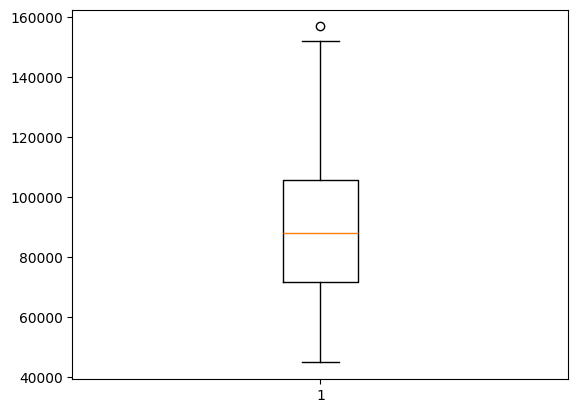

In [22]:
plt.boxplot(df["salary_min"].to_pandas(), vert=True)

<Axes: xlabel='job_title'>

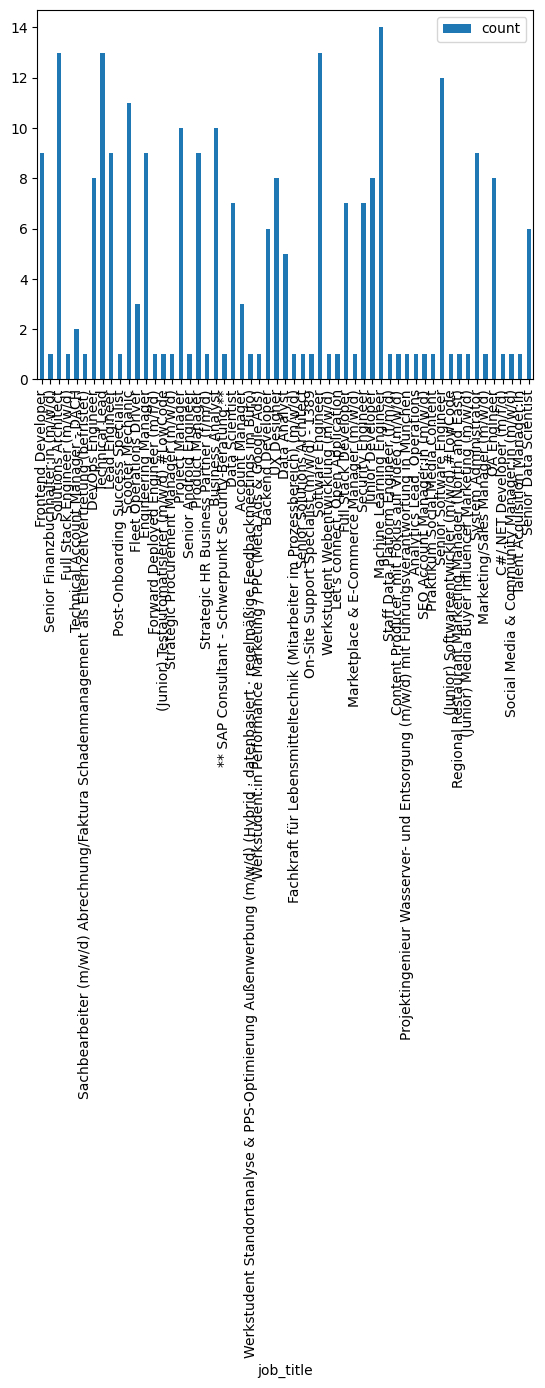

In [28]:
(df["job_title"]
 .value_counts()
 .to_pandas()
 .set_index("job_title")
 .plot(kind="bar", legend=True))

In [29]:
df["job_title"].value_counts().sort("count", descending=True).head(10)

job_title,count
str,u32
"""Machine Learning Engineer""",14
"""Technical Lead""",13
"""Solutions Architect""",13
"""Software Engineer""",13
"""Senior Software Engineer""",12
"""Scooter Mechanic""",11
"""Project Manager""",10
"""Business Analyst""",10
"""Engineering Manager""",9


<Axes: xlabel='company'>

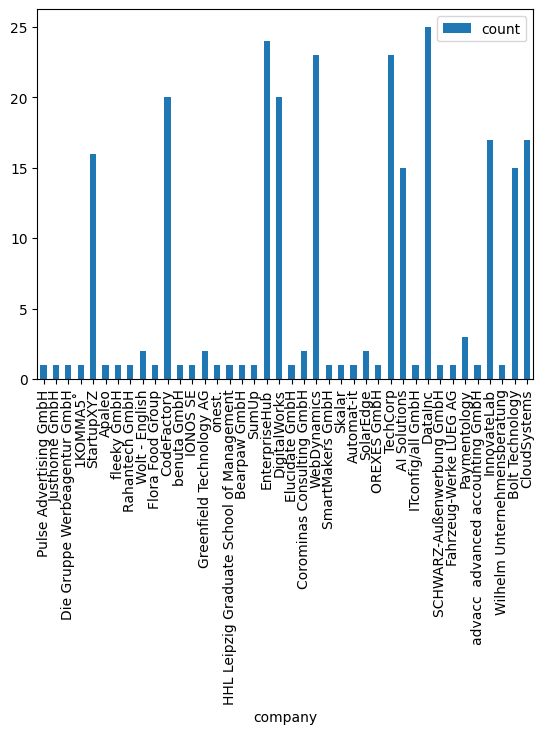

In [30]:
(df["company"]
 .value_counts()
 .to_pandas()
 .set_index("company")
 .plot(kind="bar", legend=True))

<Axes: xlabel='location'>

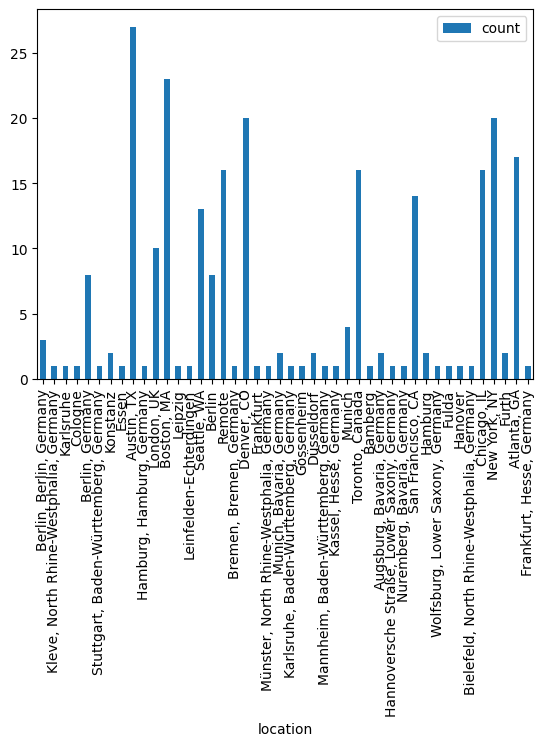

In [31]:
(df["location"]
 .value_counts()
 .to_pandas()
 .set_index("location")
 .plot(kind="bar", legend=True))

<Axes: xlabel='category'>

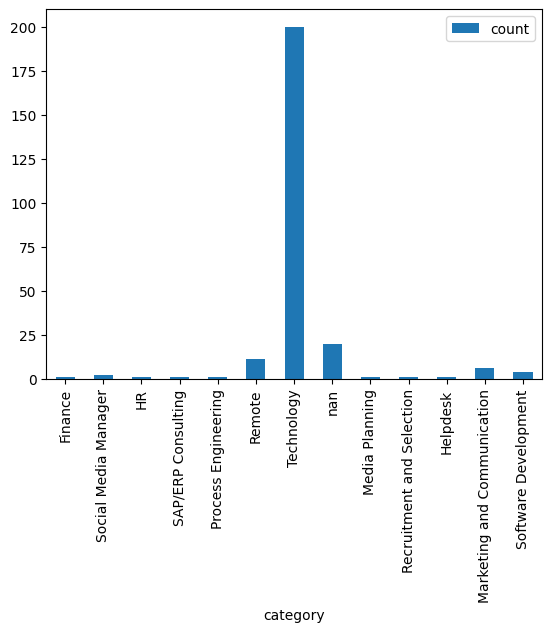

In [32]:
(df["category"]
 .value_counts()
 .to_pandas()
 .set_index("category")
 .plot(kind="bar", legend=True))

In [34]:
df.select((pl.col("category") == "Technology").mean()).item()

0.8695652173913043

<Axes: xlabel='experience_required'>

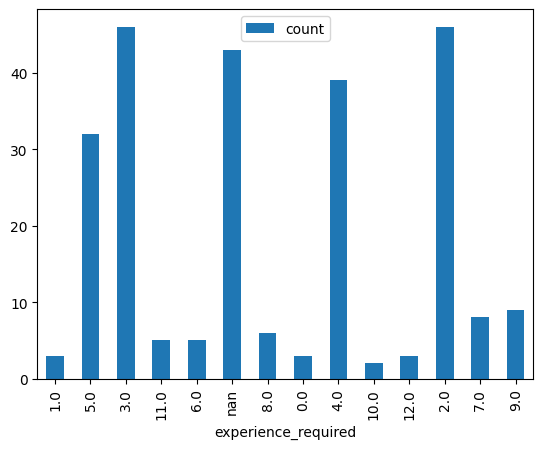

In [33]:
(df["experience_required"]
 .value_counts()
 .to_pandas()
 .set_index("experience_required")
 .plot(kind="bar", legend=True))

In [ ]:
from collections import defaultdict

skills_dict = defaultdict(int)

for row in df["skills"].to_list():
    if row is None:
        row = "nan"
    
    clean_row = row.strip("\"").strip()
    skills = [skill.strip() for skill in clean_row.split(",")]

    for skill in skills:
        skills_dict[skill] += 1

len(skills_dict)

20

In [37]:
skills_dict

defaultdict(int,
            {'AWS': 56,
             'Agile': 57,
             'Machine Learning': 71,
             'Kubernetes': 48,
             'MongoDB': 38,
             'Ruby': 55,
             'Java': 47,
             'Git': 59,
             'SQL': 51,
             'Go': 60,
             'Python': 67,
             'Docker': 58,
             'REST APIs': 53,
             'TypeScript': 55,
             'JavaScript': 54,
             'CI/CD': 56,
             'Node.js': 52,
             'React': 52,
             'TensorFlow': 43,
             'nan': 50})